## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings('ignore')

## Import the dataset and understanding of data

In [2]:
leadscore_df = pd.read_csv('Leads.csv')
leadscore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leadscore_df.shape

(9240, 37)

# Exploratory Data Analysis

## Data Cleaning

In [5]:
leadscore_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
(leadscore_df.isnull().sum()/leadscore_df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
for col in ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
             'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']:
    
    leadscore_df[col] = leadscore_df[col].apply(lambda x : 1 if x=='Yes' else 0);
leadscore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [8]:
# imputing 'select' to nan value since it is missing data
leadscore_df = leadscore_df.replace('Select', np.nan)
leadscore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [9]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
leadscore_df = leadscore_df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [11]:
leadscore_df.loc[leadscore_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [12]:
leadscore_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [13]:
leadscore_df = leadscore_df.drop(['Prospect ID','Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],1)

In [14]:
leadscore_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,NaN,NaN,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,NaN,NaN,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,NaN,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,NaN,Mumbai,0,Modified


In [15]:
(leadscore_df.isnull().sum()/leadscore_df.shape[0])*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [16]:
#Dropping columns with above 45% missing values
leadscore_df = leadscore_df.drop(['How did you hear about X Education','Lead Profile'],1)

In [17]:
leadscore_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,NaN,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,NaN,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


In [18]:
(leadscore_df.isnull().sum()/leadscore_df.shape[0])*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [19]:
leadscore_df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [20]:
leadscore_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Germany                    4
Nigeria                    4
Sweden                     3
Netherlands                2
China                      2
Bangladesh                 2
Ghana                      2
Uganda                     2
Belgium                    2
Italy                      2
Asia/Pacific Region        2
Philippines                2
Russia                     1
Kenya                      1
Denmark                    1
Indonesia                  1
Malaysia                   1
Liberia                    1
Sri Lanka     

In [21]:
leadscore_df = leadscore_df.drop(['Country','What matters most to you in choosing a course'],1)

In [22]:
leadscore_df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [23]:
leadscore_df.Specialization.value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

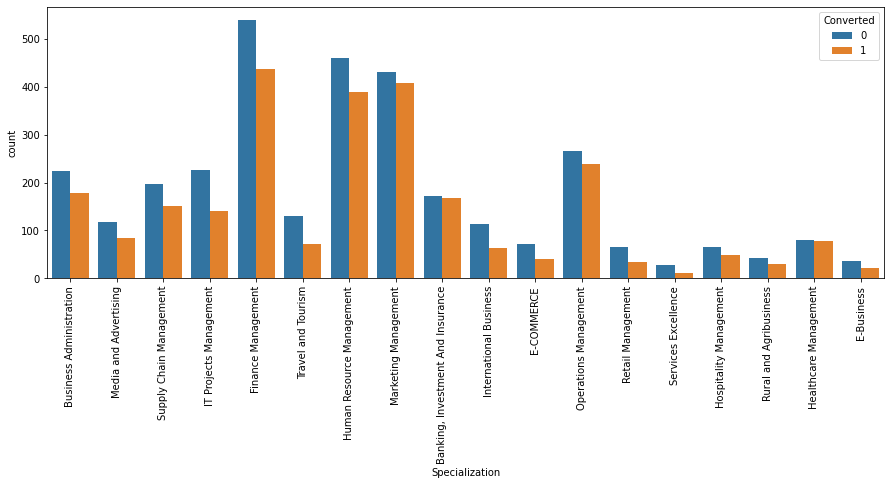

In [24]:
# plot to show count of converted and non converted vs Specialization
plt.figure(figsize=(15,5))
s1=sns.countplot(leadscore_df.Specialization, hue=leadscore_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [25]:
#combining all Management related fields under one umbrella
leadscore_df['Specialization'] = leadscore_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                                         'Marketing Management','Operations Management','IT Projects Management',
                                                                         'Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management')
leadscore_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,0,0,0,0,0,0,Interested in other courses,NaN,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,0,0,0,0,0,0,Ringing,NaN,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


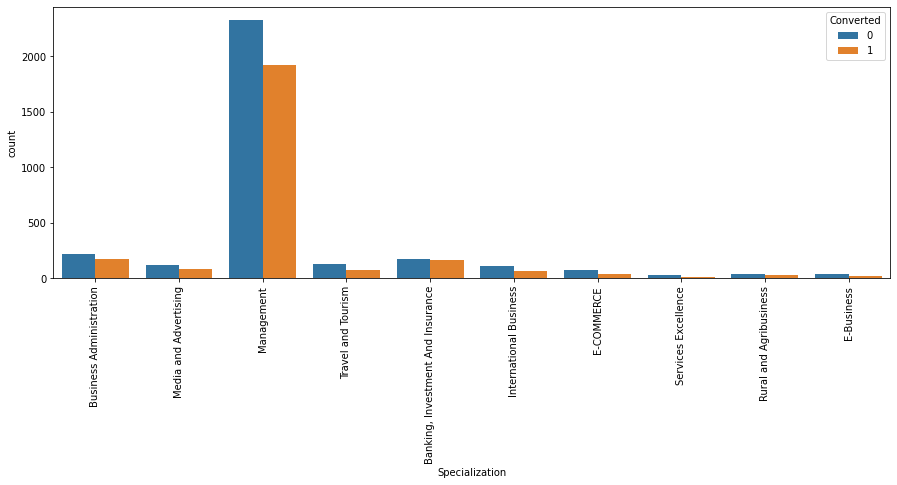

In [26]:
# plot to show count of converted and non converted vs Specialization
plt.figure(figsize=(15,5))
s1=sns.countplot(leadscore_df.Specialization, hue=leadscore_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [27]:
leadscore_df['Specialization'] = leadscore_df['Specialization'].replace(np.nan, 'Management')
leadscore_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Management,Unemployed,0,0,0,0,0,0,Interested in other courses,NaN,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Management,Unemployed,0,0,0,0,0,0,Ringing,NaN,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Management,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


In [28]:
leadscore_df.Specialization.describe()

count           9240
unique            10
top       Management
freq            7633
Name: Specialization, dtype: object

In [29]:
leadscore_df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

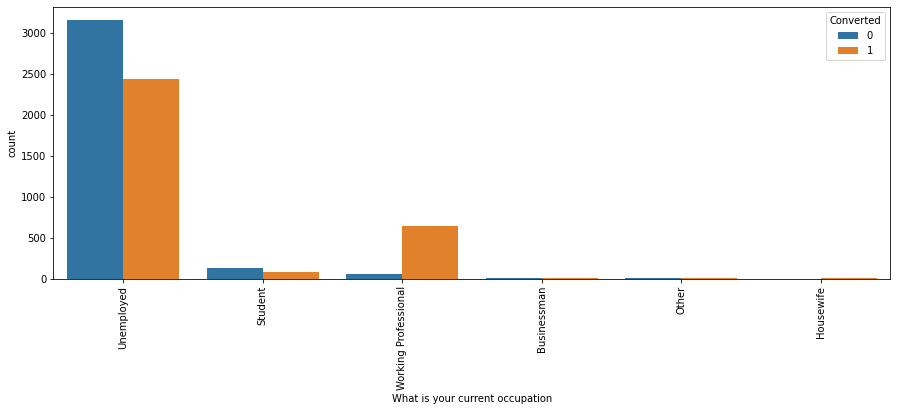

In [30]:
# plot to show count of converted and non converted vs current occupation
plt.figure(figsize=(15,5))
s1=sns.countplot(leadscore_df['What is your current occupation'], hue=leadscore_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [31]:
leadscore_df['What is your current occupation'] = leadscore_df['What is your current occupation'].replace(np.nan, 'Unemployed')
leadscore_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Management,Unemployed,0,0,0,0,0,0,Interested in other courses,NaN,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Management,Unemployed,0,0,0,0,0,0,Ringing,NaN,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Management,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


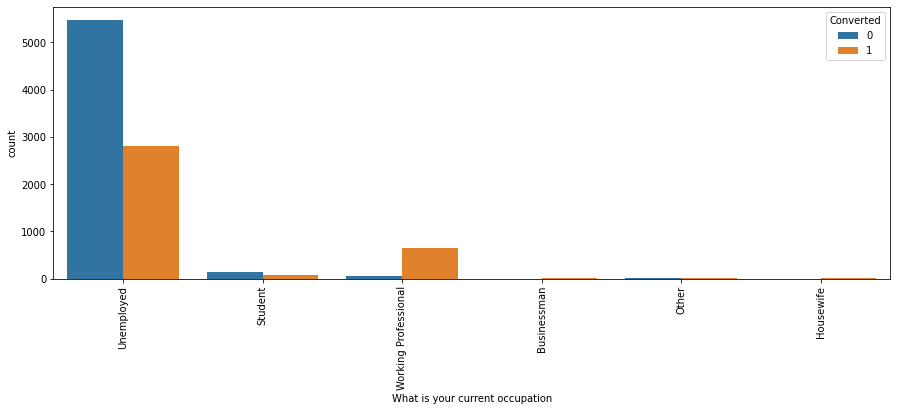

In [32]:
# plot to show count of converted and non converted vs current occupation
plt.figure(figsize=(15,5))
s1=sns.countplot(leadscore_df['What is your current occupation'], hue=leadscore_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [33]:
leadscore_df.Tags.value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [34]:
leadscore_df['Tags'] = leadscore_df['Tags'].replace(np.nan, 'Not specified')
leadscore_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Management,Unemployed,0,0,0,0,0,0,Interested in other courses,NaN,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Management,Unemployed,0,0,0,0,0,0,Ringing,NaN,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Management,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


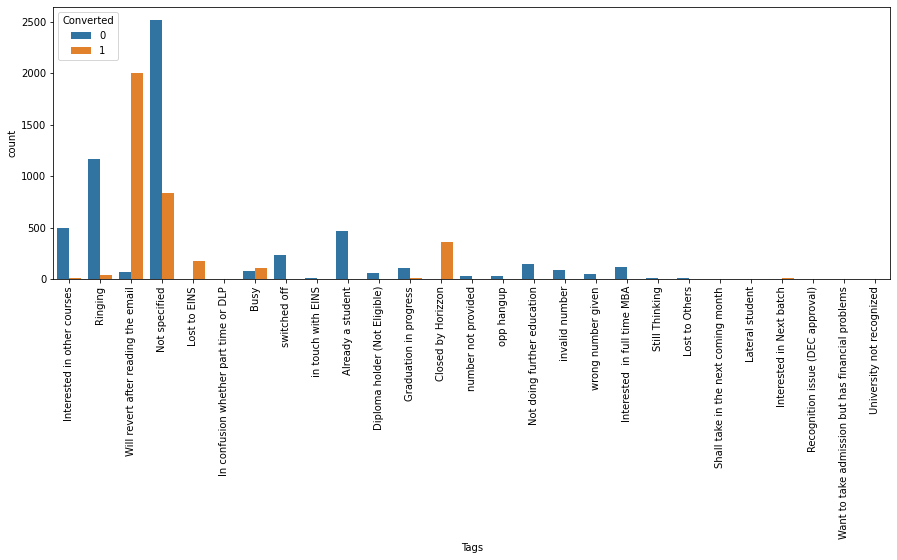

In [35]:
# plot to show count of converted and non converted vs Tags
plt.figure(figsize=(15,5))
s1=sns.countplot(leadscore_df['Tags'], hue=leadscore_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [36]:
leadscore_df.Tags.value_counts()

Not specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [37]:
Tags_modify = ['Recognition issue (DEC approval)','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Not doing further education','Interested  in full time MBA','Graduation in progress','invalid number',
    'Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others',
            'Still Thinking','Want to take admission but has financial problems']



In [38]:
leadscore_df['Tags'] = leadscore_df['Tags'].replace(Tags_modify, 'Others')
leadscore_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Management,Unemployed,0,0,0,0,0,0,Interested in other courses,NaN,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Management,Unemployed,0,0,0,0,0,0,Ringing,NaN,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Management,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


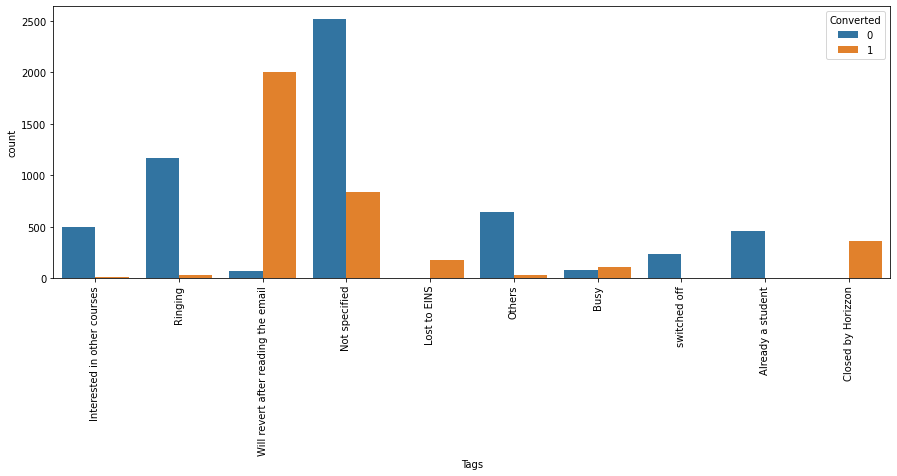

In [39]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leadscore_df['Tags'], hue=leadscore_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [40]:
leadscore_df.City.value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

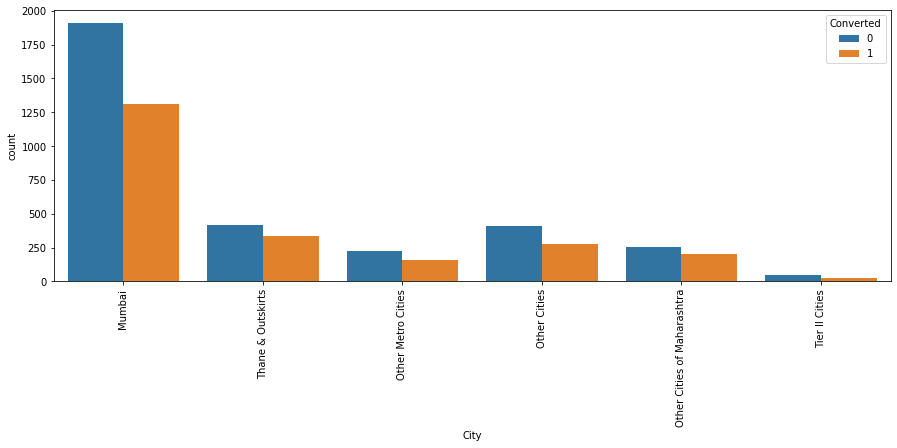

In [41]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leadscore_df['City'], hue=leadscore_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [42]:
leadscore_df['City'] = leadscore_df['City'].replace(np.nan, 'Mumbai')
leadscore_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Management,Unemployed,0,0,0,0,0,0,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Management,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Management,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


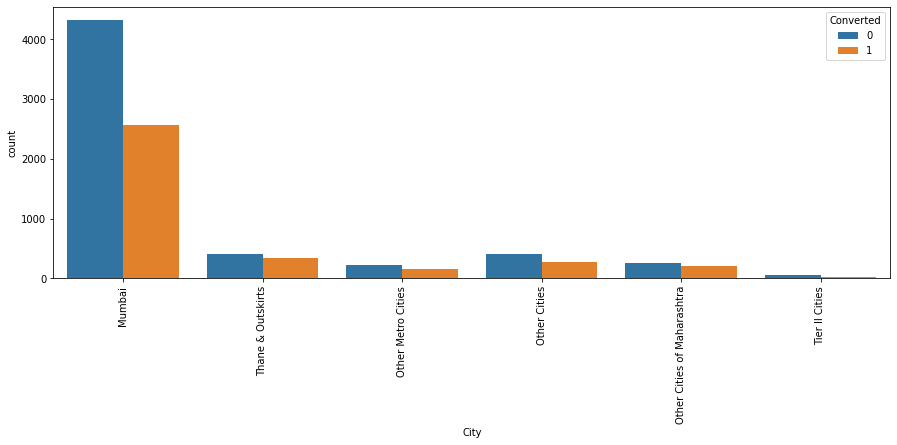

In [43]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leadscore_df['City'], hue=leadscore_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [49]:
round((leadscore_df.isnull().sum()/leadscore_df.shape[0])*100,2)

Lead Number                               0.0
Lead Origin                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [51]:
leads_Conversion_rate = (sum(leadscore_df['Converted'])/len(leadscore_df['Converted'].index))*100
print(leads_Conversion_rate)

38.02043282434362


In [52]:
leadscore_df.dropna(inplace = True)

In [53]:
round((leadscore_df.isnull().sum()/leadscore_df.shape[0])*100,2)

Lead Number                               0.0
Lead Origin                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [54]:
leadscore_df.head()

,Lead Number,Lead Origin,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,0,0,0,0.0,0,0.0,Page Visited on Website,Management,Unemployed,0,0,0,0,0,0,Interested in other courses,Mumbai,0,Modified
1,660728,API,0,0,0,5.0,674,2.5,Email Opened,Management,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,0,Email Opened
2,660727,Landing Page Submission,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,0,0,1,2.0,1428,1.0,Converted to Lead,Management,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


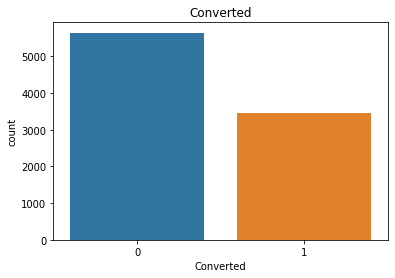

In [55]:
plt.title('Converted')
sns.countplot(leadscore_df['Converted'])
plt.show()

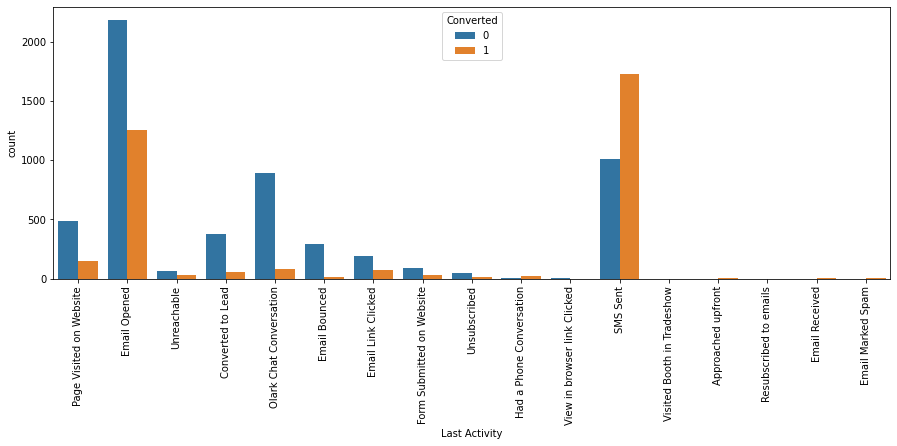

In [56]:

plt.figure(figsize=(15,5))
s1=sns.countplot(leadscore_df['Last Activity'], hue=leadscore_df['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [57]:
leadscore_df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

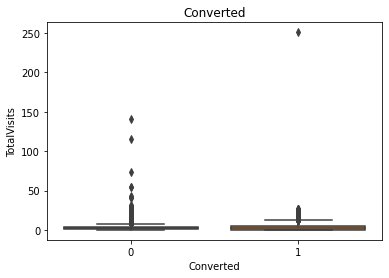

In [58]:
plt.title('Converted')
sns.boxplot(y = 'TotalVisits', x= 'Converted', data = leadscore_df)
plt.show()

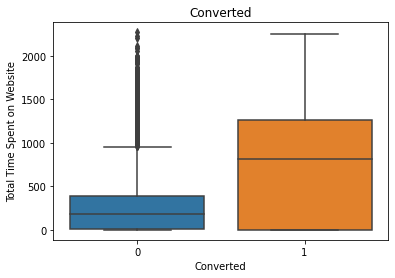

In [59]:
plt.title('Converted')
sns.boxplot(y = 'Total Time Spent on Website', x= 'Converted', data = leadscore_df)
plt.show()

In [60]:
leadscore_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [61]:
Q3 = leadscore_df.TotalVisits.quantile(0.99)
leadscore_df = leadscore_df[(leadscore_df.TotalVisits <= Q3)]

In [62]:
leadscore_df.shape

(9020, 21)

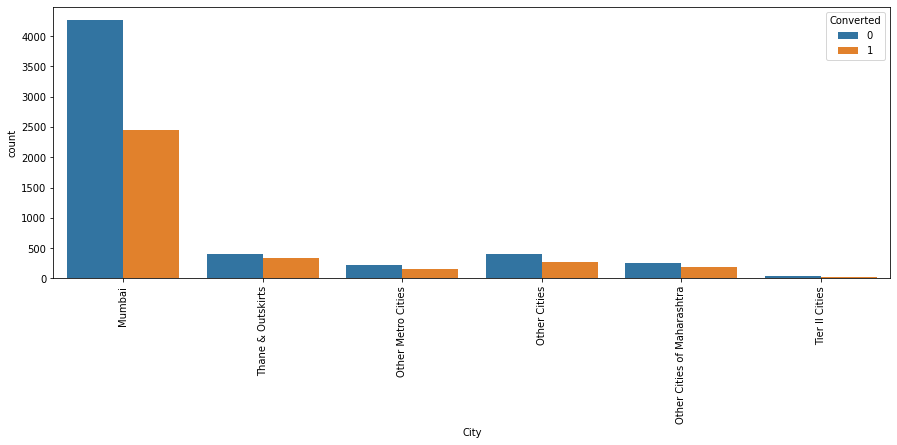

In [63]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leadscore_df['City'], hue=leadscore_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

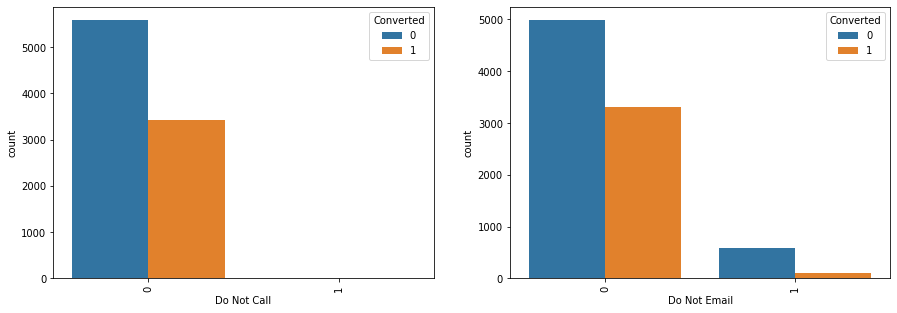

In [64]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leadscore_df['Do Not Call'], hue=leadscore_df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leadscore_df['Do Not Email'], hue=leadscore_df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [67]:
lead_source_modify = ['Facebook','bing','google','Click2call','Press_Release','Social Media','Live Chat','youtubechannel',
                     'testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM']
leadscore_df.head()

,Lead Number,Lead Origin,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,0,0,0,0.0,0,0.0,Page Visited on Website,Management,Unemployed,0,0,0,0,0,0,Interested in other courses,Mumbai,0,Modified
1,660728,API,0,0,0,5.0,674,2.5,Email Opened,Management,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,0,Email Opened
2,660727,Landing Page Submission,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,0,0,1,2.0,1428,1.0,Converted to Lead,Management,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


In [68]:
leadscore_df.columns

Index(['Lead Number', 'Lead Origin', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [69]:
leadscore_df.select_dtypes(include = 'object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Lead Origin                      9020 non-null   object
 1   Last Activity                    9020 non-null   object
 2   Specialization                   9020 non-null   object
 3   What is your current occupation  9020 non-null   object
 4   Tags                             9020 non-null   object
 5   City                             9020 non-null   object
 6   Last Notable Activity            9020 non-null   object
dtypes: object(7)
memory usage: 821.8+ KB


In [70]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9020 non-null   int64  
 1   Lead Origin                             9020 non-null   object 
 2   Do Not Email                            9020 non-null   int64  
 3   Do Not Call                             9020 non-null   int64  
 4   Converted                               9020 non-null   int64  
 5   TotalVisits                             9020 non-null   float64
 6   Total Time Spent on Website             9020 non-null   int64  
 7   Page Views Per Visit                    9020 non-null   float64
 8   Last Activity                           9020 non-null   object 
 9   Specialization                          9020 non-null   object 
 10  What is your current occupation         9020 non-null   obje

In [71]:
leadscore_df['Do Not Call'].value_counts()

0    9018
1       2
Name: Do Not Call, dtype: int64

In [72]:
leadscore_df = leadscore_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'],1)

In [73]:
leadscore_df = leadscore_df.drop(['Through Recommendations'],1)

In [74]:
leadscore_df.head()

,Lead Number,Lead Origin,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,0,0,0.0,0,0.0,Page Visited on Website,Management,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,0,0,5.0,674,2.5,Email Opened,Management,Unemployed,Ringing,Mumbai,0,Email Opened
2,660727,Landing Page Submission,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,0,1,2.0,1428,1.0,Converted to Lead,Management,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [76]:
dummy_var1 = pd.get_dummies(leadscore_df[['Lead Origin','Last Activity','Specialization','What is your current occupation','Tags',
                           'City','Last Notable Activity']], drop_first = True)
dummy_var1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [78]:
leadscore_df = leadscore_df.drop(['Lead Origin','Last Activity','Specialization','What is your current occupation','Tags',
                           'City','Last Notable Activity'],1)

In [79]:
leadscore_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,660737,0,0,0.0,0,0.0,0
1,660728,0,0,5.0,674,2.5,0
2,660727,0,1,2.0,1532,2.0,1
3,660719,0,0,1.0,305,1.0,0
4,660681,0,1,2.0,1428,1.0,0


In [80]:
leadscore_df = pd.concat([leadscore_df, dummy_var1],1)


In [81]:
leadscore_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [82]:
X = leadscore_df.drop(['Lead Number','Converted'],axis = 1)
Y = leadscore_df['Converted']

In [83]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [84]:
Y.head(10)

0    0
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    0
9    0
Name: Converted, dtype: int64

## Data Model Preparation

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8,test_size=0.2, random_state = 200)

In [86]:
Y.shape

(9020,)

In [87]:
scaler_var = StandardScaler()

scaler_var1 = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
x_train[scaler_var1] = scaler_var.fit_transform(x_train[scaler_var1])

In [88]:
rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 15)             
rfe = rfe.fit(x_train, y_train)

In [89]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 5),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 27),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Last Activity_Converted to Lead', False, 9),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clicked', False, 18),
 ('Last Activity_Email Marked Spam', False, 47),
 ('Last Activity_Email Opened', False, 40),
 ('Last Activity_Email Received', False, 44),
 ('Last Activity_Form Submitted on Website', False, 14),
 ('Last Activity_Had a Phone Conversation', False, 20),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_Resubscribed to emails', False, 42),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 36),
 ('Last Activity_Unsubscribed', F

In [90]:
col_rfe = x_train.columns[rfe.support_]
col_rfe

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not specified',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [91]:
# model 1
x_train_sm = sm.add_constant(x_train[col_rfe])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7216
Model:                            GLM   Df Residuals:                     7200
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1382.6
Date:                Tue, 18 Oct 2022   Deviance:                       2765.3
Time:                        19:11:10   Pearson chi2:                 1.23e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6102
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0507      0.203    -15.026      0.000      -3.449      -2.653
Total Time Spent on Website                              0.9659      0.052     18.401      0.000       0.863       1.069
Lead Origin_Landing Page Submission                     -1.0995      0.113     -9.702      0.000      -1.322      -0.877
Lead Origin_Lead Add Form                                2.6131      0.275      9.493      0.000       2.074       3.153
Last Activity_SMS Sent                                   1.5620      0.212      7.356      0.000       1.146       1.978
What is your current occupation_Working Professional     1.0262      0.377      2.719      0.007       0.286       1.766
Tags_Busy                                                2.9278      0.279     10.509      0.000       2.382       3.474
Tags_Closed by Horizzon                                  8.6942      0.752     11.564      0.000       7.221      10.168
Tags_Lost to EINS                                        8.3480      0.633     13.197      0.000       7.108       9.588
Tags_Not specified                                       2.1690      0.198     10.961      0.000       1.781       2.557
Tags_Ringing                                            -1.5226      0.296     -5.146      0.000      -2.102      -0.943
Tags_Will revert after reading the email                 6.7265      0.259     25.992      0.000       6.219       7.234
Tags_switched off                                       -1.5942      0.568     -2.808      0.005      -2.707      -0.481
Last Notable Activity_Modified                          -1.5308      0.147    -10.445      0.000      -1.818      -1.244
Last Notable Activity_Olark Chat Conversation           -1.7588      0.443     -3.967      0.000      -2.628      -0.890
Last Notable Activity_SMS Sent                           0.6256      0.244      2.561      0.010       0.147       1.104
========================================================================================================================
"""

In [92]:
# Checking for VIF values

vif = pd.DataFrame()
vif['Features'] = x_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(x_train[col_rfe].values, i) for i in range(x_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 4)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,6.0600
3,Last Activity_SMS Sent,5.9297
1,Lead Origin_Landing Page Submission,2.1184
10,Tags_Will revert after reading the email,2.0354
12,Last Notable Activity_Modified,1.7639
8,Tags_Not specified,1.6386
2,Lead Origin_Lead Add Form,1.4538
9,Tags_Ringing,1.3666
4,What is your current occupation_Working Profes...,1.3220
0,Total Time Spent on Website,1.2686


In [93]:
col_rfe = col_rfe.drop(['Last Notable Activity_SMS Sent'],1)

In [94]:
print(col_rfe)

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not specified',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')


In [95]:
# model 2
x_train_sm = sm.add_constant(x_train[col_rfe])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7216
Model:                            GLM   Df Residuals:                     7201
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1385.9
Date:                Tue, 18 Oct 2022   Deviance:                       2771.9
Time:                        19:11:32   Pearson chi2:                 1.28e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6098
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9751      0.200    -14.897      0.000      -3.367      -2.584
Total Time Spent on Website                              0.9593      0.052     18.330      0.000       0.857       1.062
Lead Origin_Landing Page Submission                     -1.1150      0.113     -9.902      0.000      -1.336      -0.894
Lead Origin_Lead Add Form                                2.5728      0.274      9.386      0.000       2.036       3.110
Last Activity_SMS Sent                                   2.0274      0.110     18.376      0.000       1.811       2.244
What is your current occupation_Working Professional     1.0109      0.376      2.688      0.007       0.274       1.748
Tags_Busy                                                2.9254      0.277     10.565      0.000       2.383       3.468
Tags_Closed by Horizzon                                  8.8224      0.752     11.732      0.000       7.349      10.296
Tags_Lost to EINS                                        8.4662      0.633     13.369      0.000       7.225       9.707
Tags_Not specified                                       2.1513      0.197     10.906      0.000       1.765       2.538
Tags_Ringing                                            -1.4545      0.293     -4.963      0.000      -2.029      -0.880
Tags_Will revert after reading the email                 6.7766      0.260     26.055      0.000       6.267       7.286
Tags_switched off                                       -1.5239      0.566     -2.694      0.007      -2.633      -0.415
Last Notable Activity_Modified                          -1.7643      0.120    -14.740      0.000      -1.999      -1.530
Last Notable Activity_Olark Chat Conversation           -1.8221      0.444     -4.102      0.000      -2.693      -0.951
========================================================================================================================
"""

In [96]:
# Checking for VIF values

vif = pd.DataFrame()
vif['Features'] = x_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(x_train[col_rfe].values, i) for i in range(x_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 4)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.1160
10,Tags_Will revert after reading the email,1.9723
3,Last Activity_SMS Sent,1.6719
8,Tags_Not specified,1.6099
12,Last Notable Activity_Modified,1.4655
2,Lead Origin_Lead Add Form,1.4533
9,Tags_Ringing,1.3435
4,What is your current occupation_Working Profes...,1.3218
0,Total Time Spent on Website,1.2664
6,Tags_Closed by Horizzon,1.2381


In [97]:
#predictions on training data
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

9067    0.913058
3350    0.929150
5110    0.005666
3005    0.988791
2997    0.021297
2398    0.001245
8834    0.031813
7200    0.004866
885     0.036316
1639    0.003740
dtype: float64

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.91305768, 0.92915031, 0.00566566, 0.98879068, 0.02129741,
       0.00124479, 0.03181293, 0.00486645, 0.03631638, 0.00374004])

In [99]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Lead_Pred'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head(15)


,Converted,Converted_prob,Lead ID,Lead_Pred
0,1,0.913058,9067,1
1,1,0.929150,3350,1
2,0,0.005666,5110,0
3,1,0.988791,3005,1
4,0,0.021297,2997,0
5,0,0.001245,2398,0
6,0,0.031813,8834,0
7,0,0.004866,7200,0
8,0,0.036316,885,0
9,0,0.003740,1639,0


In [100]:
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Lead_Pred )
print(confusion_mat)

[[4304  191]
 [ 301 2420]]


In [101]:
print(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Lead_Pred),2))

0.93


In [102]:
# creating columns with probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Lead_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.913058,9067,1,1,1,1,1,1,1,1,1,1,1
1,1,0.929150,3350,1,1,1,1,1,1,1,1,1,1,1
2,0,0.005666,5110,0,1,0,0,0,0,0,0,0,0,0
3,1,0.988791,3005,1,1,1,1,1,1,1,1,1,1,1
4,0,0.021297,2997,0,1,0,0,0,0,0,0,0,0,0


In [103]:
# calculate accuracy sensitivity and specificity for probability cutoff.
cutoff_df = pd.DataFrame( columns = ['prob_cutoff','accuracy_value','sensit','specif'])
from sklearn.metrics import confusion_matrix
num1 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num1:
    c1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(c1))
    accuracy = (c1[0,0]+c1[1,1])/total1
    
    specit = c1[0,0]/(c1[0,0]+c1[0,1])      # tn/tn+fn
    sensif = c1[1,1]/(c1[1,0]+c1[1,1])      #tp/tp+fp
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

NameError: name 'sensi' is not defined

In [104]:
# repeating with different cutoff
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Lead_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.913058,9067,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.929150,3350,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.005666,5110,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.988791,3005,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.021297,2997,0,1,0,0,0,0,0,0,0,0,0,0


In [105]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Lead ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Lead ID,final_Predicted,Lead_Score
0,1,0.913058,9067,1,91
1,1,0.929150,3350,1,93
2,0,0.005666,5110,0,1
3,1,0.988791,3005,1,99
4,0,0.021297,2997,0,2


In [106]:
# check the overall accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9284922394678492

In [107]:
print(precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted))
print(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

0.8987341772151899
0.9132671811833885


In [108]:
#scaling test set
num_cols1=x_test.select_dtypes(include=['float64', 'int64']).columns
x_test[num_cols1] = scaler_var.fit_transform(x_test[num_cols1])

x_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3995,-0.309823,-0.408049,0.473918,-0.171871,1.430838,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4320,-0.309823,0.262065,1.147347,-0.171871,1.430838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3060,-0.309823,0.262065,1.965343,0.814138,-0.698891,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2137,-0.309823,0.262065,-0.757651,-0.502184,1.430838,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
607,-0.309823,-1.078163,-0.878429,-1.157881,-0.698891,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [109]:
x_test = x_test[col_rfe]
x_test_sm = sm.add_constant(x_test)
y_test_pred = res.predict(x_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)

In [112]:
y_pred_1.head()

,0
3995,0.025694
4320,0.997025
3060,0.998640
2137,0.001886
607,0.996966


In [113]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead ID'] = y_test_df.index

In [114]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [115]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [116]:
# Rearranging the columns
y_pred_final = y_pred_final[['Lead ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score
0,3995,0,0.025694,3
1,4320,1,0.997025,100
2,3060,1,0.998640,100
3,2137,0,0.001886,0
4,607,1,0.996966,100


In [118]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3995,0,0.025694,3,0
1,4320,1,0.997025,100,1
2,3060,1,0.998640,100,1
3,2137,0,0.001886,0,0
4,607,1,0.996966,100,1


In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9223946784922394

In [121]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3

array([[1031,   69],
       [  71,  633]], dtype=int64)

In [122]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9017094017094017

In [123]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8991477272727273